In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("./Dataset/combined_design_dataset.csv")
df.head(10)

,description,font,color_palette
0,A modern tech startup website,Rouge Script,"#b96460,#563371,#b78936,#82dc2c,#28b34e"
1,A vintage coffee shop menu,Patua One,"#35ae97,#4917e8,#3edec7,#2d0b25,#f8bb90"
2,A minimalist photography portfolio,Numans,"#a90421,#cd8643,#dc2b6c,#10c5bb,#15c835"
3,A vibrant fashion e-commerce site,Bangers,"#68f006,#e8aca2,#01b2fe,#f07642,#aa299d"
4,A cozy bookstore flyer,Brawler,"#6779b6,#c2610f,#0ea5e3,#4b906a,#cd97bc"
5,A professional corporate business website,Delius Unicase,"#b7ee81,#8e29cd,#7aa04c,#004ddd,#6a04cd"
6,A playful kids' educational app,Linefont,"#e88eb6,#21dd51,#8c771e,#f6386b,#715d9e"
7,A bold and colorful travel blog,Belgrano,"#317734,#c586d7,#d2d66d,#81d385,#f067a9"
8,A sleek and modern real estate brochure,Water Brush,"#317734,#c586d7,#d2d66d,#81d385,#f067a9"
9,A retro-themed music festival poster,Zhi Mang Xing,"#0580b1,#2a2e61,#35f598,#79f619,#946cdc"


## Data Cleaning

#### Checking Missing values

In [4]:
df.isnull().sum()

description      0
font             0
color_palette    0
dtype: int64

#### Checking Duplicate values

In [5]:
df.duplicated().sum()

0

#### Data Types

In [6]:
df.dtypes

description      object
font             object
color_palette    object
dtype: object

#### Checking font and color palette consistency

In [7]:
print("Unique Fonts: ", df['font'].nunique())
print("Unique Color Palettes: ", df['color_palette'].nunique())

Unique Fonts:  98
Unique Color Palettes:  63


## Data Preprocessing

In [8]:
font_encoder = LabelEncoder()
df['font_encoded'] = font_encoder.fit_transform(df['font'])

palette_encoder = LabelEncoder()
df['color_palette_encoded'] = palette_encoder.fit_transform(df['color_palette'])

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['description'])
sequences = tokenizer.texts_to_sequences(df['description'])
padded_sequences = pad_sequences(sequences, maxlen=20, padding='post')

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
with open("font_encoder.pkl", "wb") as f:
    pickle.dump(font_encoder, f)
with open("palette_encoder.pkl", "wb") as f:
    pickle.dump(palette_encoder, f)

In [12]:
df['description_sequence'] = list(padded_sequences)
df.head(10)

,description,font,color_palette,font_encoded,color_palette_encoded,description_sequence
0,A modern tech startup website,Rouge Script,"#b96460,#563371,#b78936,#82dc2c,#28b34e",84,50,"[2, 9, 10, 83, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,A vintage coffee shop menu,Patua One,"#35ae97,#4917e8,#3edec7,#2d0b25,#f8bb90",76,17,"[2, 45, 84, 46, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,A minimalist photography portfolio,Numans,"#a90421,#cd8643,#dc2b6c,#10c5bb,#15c835",71,46,"[2, 28, 29, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,A vibrant fashion e-commerce site,Bangers,"#68f006,#e8aca2,#01b2fe,#f07642,#aa299d",13,29,"[2, 14, 47, 85, 86, 7, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,A cozy bookstore flyer,Brawler,"#6779b6,#c2610f,#0ea5e3,#4b906a,#cd97bc",18,28,"[2, 48, 87, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
5,A professional corporate business website,Delius Unicase,"#b7ee81,#8e29cd,#7aa04c,#004ddd,#6a04cd",28,49,"[2, 30, 88, 89, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,A playful kids' educational app,Linefont,"#e88eb6,#21dd51,#8c771e,#f6386b,#715d9e",51,60,"[2, 49, 90, 50, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
7,A bold and colorful travel blog,Belgrano,"#317734,#c586d7,#d2d66d,#81d385,#f067a9",15,14,"[2, 31, 19, 32, 51, 11, 0, 0, 0, 0, 0, 0, 0, 0..."
8,A sleek and modern real estate brochure,Water Brush,"#317734,#c586d7,#d2d66d,#81d385,#f067a9",94,14,"[2, 33, 19, 9, 91, 92, 12, 0, 0, 0, 0, 0, 0, 0..."
9,A retro-themed music festival poster,Zhi Mang Xing,"#0580b1,#2a2e61,#35f598,#79f619,#946cdc",96,4,"[2, 34, 93, 52, 35, 6, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Exploratory Data Analysis

#### Summary Statistics

In [14]:
print("Dataset Info:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            100 non-null    object
 1   font                   100 non-null    object
 2   color_palette          100 non-null    object
 3   font_encoded           100 non-null    int32 
 4   color_palette_encoded  100 non-null    int32 
 5   description_sequence   100 non-null    object
dtypes: int32(2), object(4)
memory usage: 4.0+ KB
Dataset Info:
 None


In [15]:
print("Font Distribution:\n", df['font'].value_counts().head(10))

Font Distribution:
 font
Chau Philomene One    2
Lacquer               2
Rouge Script          1
Caveat                1
Anta                  1
BIZ UDPGothic         1
Kaisei Opti           1
Moirai One            1
Rubik Mono One        1
Bungee Shade          1
Name: count, dtype: int64


In [16]:
print("Color Palette Distribution:\n", df['color_palette'].value_counts().head(10))

Color Palette Distribution:
 color_palette
#3e61b7,#886a5d,#883f15,#07609e,#ee9fd9    6
#7a48a7,#8130bb,#f51aa4,#78e43a,#9f18db    4
#365a26,#74633a,#d19e27,#61d4e7,#539c58    4
#bcc8a8,#dda9b6,#7875b5,#2d2be2,#9ec046    4
#14af2f,#aac1d3,#5a7d0d,#1ecb92,#65c3d1    3
#6779b6,#c2610f,#0ea5e3,#4b906a,#cd97bc    3
#01e621,#1e404c,#382607,#4addc2,#da30b2    3
#72cd2f,#740a52,#9b8003,#d0e3f2,#c5e6ab    3
#b96460,#563371,#b78936,#82dc2c,#28b34e    2
#24012c,#d2b08f,#e6e979,#629c5c,#6fcc0e    2
Name: count, dtype: int64


## Feature Engineering

In [26]:
df['description_length'] = df['description'].apply(len)

In [27]:
keywords = ['modern', 'minimalist', 'vintage', 'bold', 'elegant']
for keyword in keywords:
    df[f'contains_{keyword}'] = df['description'].apply(lambda x: 1 if keyword in x.lower() else 0)

In [28]:
df['palette_complexity'] = df['color_palette'].apply(lambda x: len(set(x.split(','))))

In [29]:
df.head(10)

,description,font,color_palette,font_encoded,color_palette_encoded,description_sequence,description_length,contains_modern,contains_minimalist,contains_vintage,contains_bold,contains_elegant,palette_complexity
0,A modern tech startup website,Rouge Script,"#b96460,#563371,#b78936,#82dc2c,#28b34e",84,50,"[2, 9, 10, 83, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",29,1,0,0,0,0,5
1,A vintage coffee shop menu,Patua One,"#35ae97,#4917e8,#3edec7,#2d0b25,#f8bb90",76,17,"[2, 45, 84, 46, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",26,0,0,1,0,0,5
2,A minimalist photography portfolio,Numans,"#a90421,#cd8643,#dc2b6c,#10c5bb,#15c835",71,46,"[2, 28, 29, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",34,0,1,0,0,0,5
3,A vibrant fashion e-commerce site,Bangers,"#68f006,#e8aca2,#01b2fe,#f07642,#aa299d",13,29,"[2, 14, 47, 85, 86, 7, 0, 0, 0, 0, 0, 0, 0, 0,...",33,0,0,0,0,0,5
4,A cozy bookstore flyer,Brawler,"#6779b6,#c2610f,#0ea5e3,#4b906a,#cd97bc",18,28,"[2, 48, 87, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",22,0,0,0,0,0,5
5,A professional corporate business website,Delius Unicase,"#b7ee81,#8e29cd,#7aa04c,#004ddd,#6a04cd",28,49,"[2, 30, 88, 89, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",41,0,0,0,0,0,5
6,A playful kids' educational app,Linefont,"#e88eb6,#21dd51,#8c771e,#f6386b,#715d9e",51,60,"[2, 49, 90, 50, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",31,0,0,0,0,0,5
7,A bold and colorful travel blog,Belgrano,"#317734,#c586d7,#d2d66d,#81d385,#f067a9",15,14,"[2, 31, 19, 32, 51, 11, 0, 0, 0, 0, 0, 0, 0, 0...",31,0,0,0,1,0,5
8,A sleek and modern real estate brochure,Water Brush,"#317734,#c586d7,#d2d66d,#81d385,#f067a9",94,14,"[2, 33, 19, 9, 91, 92, 12, 0, 0, 0, 0, 0, 0, 0...",39,1,0,0,0,0,5
9,A retro-themed music festival poster,Zhi Mang Xing,"#0580b1,#2a2e61,#35f598,#79f619,#946cdc",96,4,"[2, 34, 93, 52, 35, 6, 0, 0, 0, 0, 0, 0, 0, 0,...",36,0,0,0,0,0,5


## Visualizations

#### Font Distribution

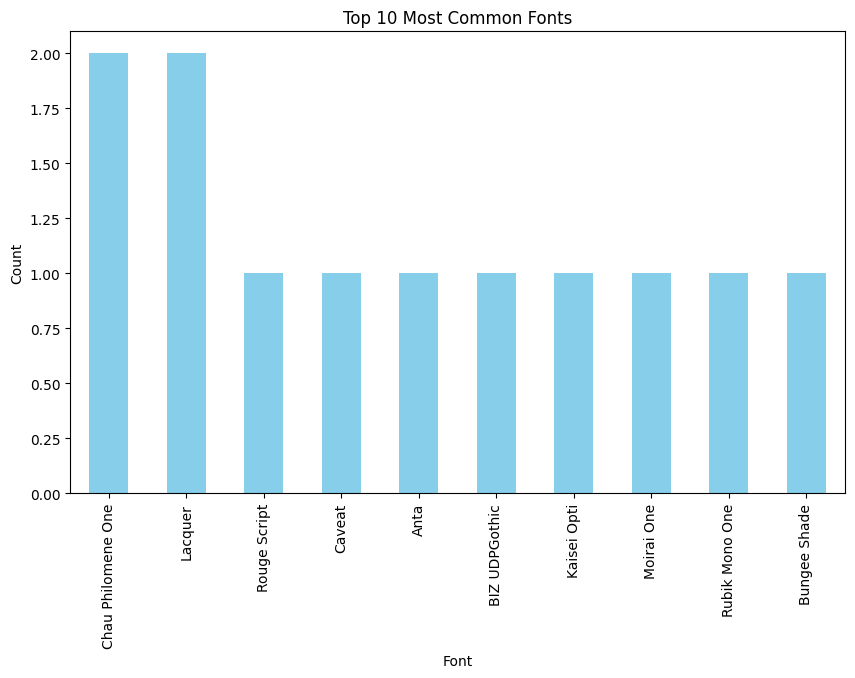

In [30]:
plt.figure(figsize=(10, 6))
df['font'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Fonts")
plt.xlabel("Font")
plt.ylabel("Count")
plt.show()

#### Color Palette Popularity

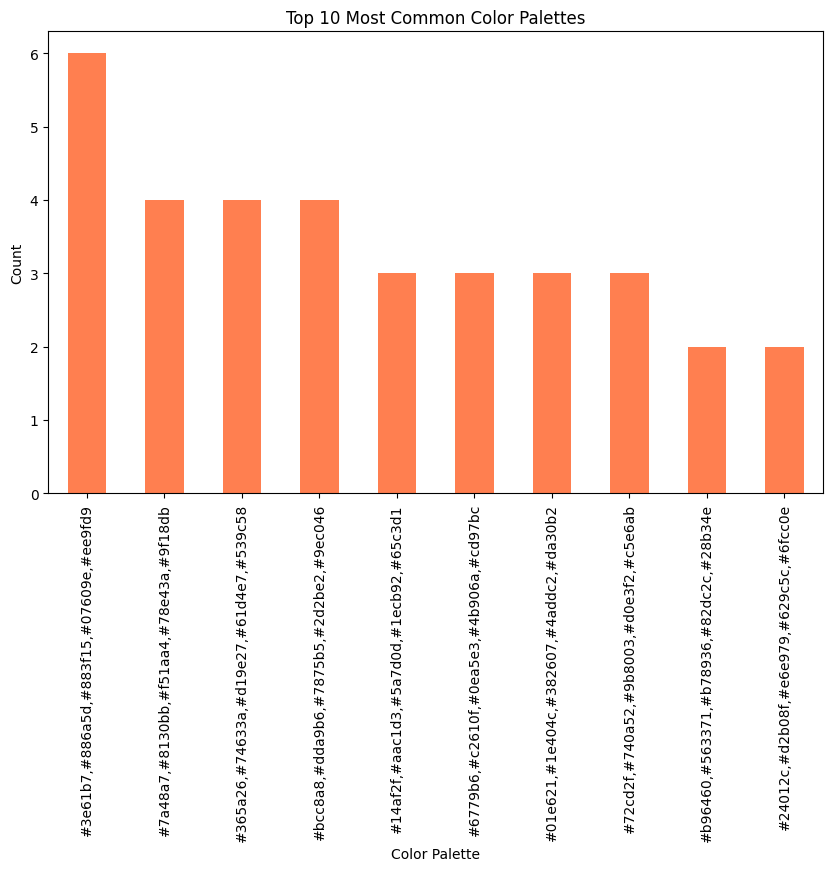

In [31]:
plt.figure(figsize=(10, 6))
df['color_palette'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Most Common Color Palettes")
plt.xlabel("Color Palette")
plt.ylabel("Count")
plt.show()

#### Word Cloud for descriptions

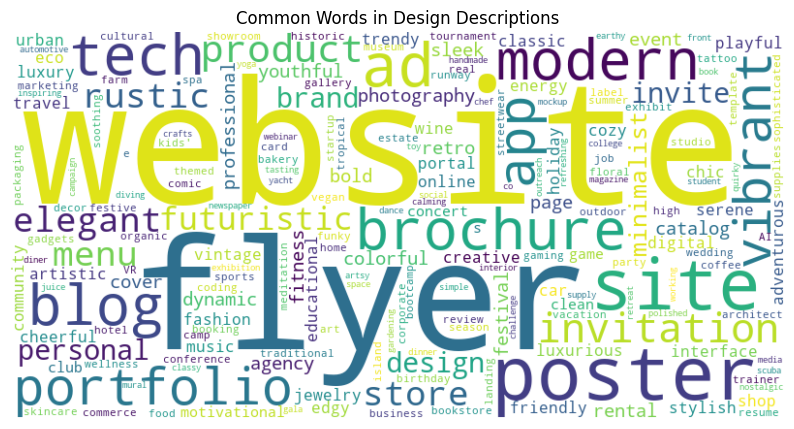

In [32]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['description']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Design Descriptions")
plt.show()

#### Box plot of description length

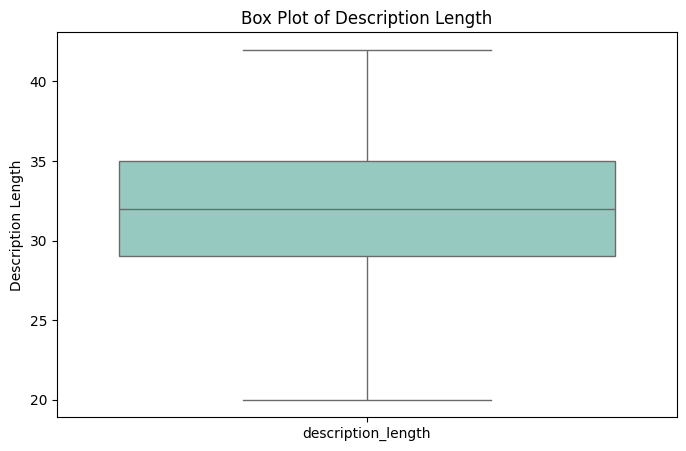

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['description_length']], palette='Set3')
plt.title('Box Plot of Description Length')
plt.ylabel('Description Length')
plt.show()

#### Clustering: Font and Color Palette encoding

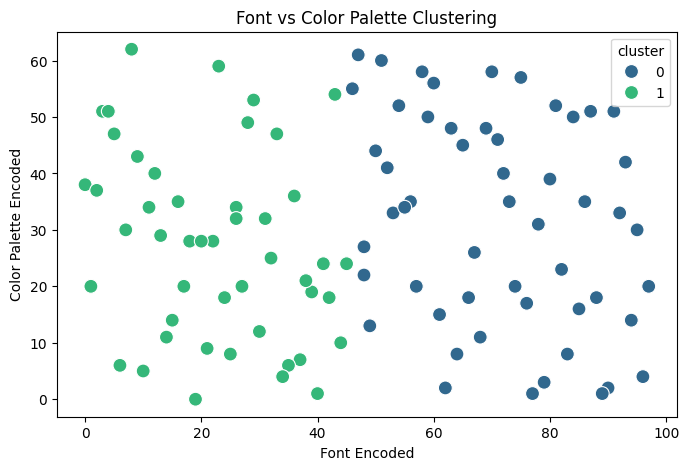

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['font_encoded', 'color_palette_encoded']])

plt.figure(figsize=(8, 5))
sns.scatterplot(x='font_encoded', y='color_palette_encoded', hue='cluster', data=df, palette='viridis', s=100)
plt.title('Font vs Color Palette Clustering')
plt.xlabel('Font Encoded')
plt.ylabel('Color Palette Encoded')
plt.show()

## Splitting the dataset

In [33]:
X_train, X_test, y_fonts_train, y_fonts_test, y_palettes_train, y_palettes_test = train_test_split(
    padded_sequences,
    df['font_encoded'],
    df['color_palette_encoded'],
    test_size=0.2,
    random_state=42
)